In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Function to map frequency scale to descriptions
def map_frequency(value):
    frequency_mapping = {
        5: 'Everyday',
        4: '3-4 times a week',
        3: '1-2 times a week',
        2: '1-2 times a month',
        1: 'Rarely',
        0: 'Never'
    }
    return frequency_mapping[value]

In [5]:
data=pd.read_csv("C:/Users/NITISH/Downloads/nitish.csv")
data

,TV,RADIO,SOCIAL_MEDIA,OTT_PLATFORM,LIVE_STREAMING_APP,PHYSICAL_NEWSPAPER,DIGITAL_NEWSPAPER,PHYSICAL_MAGAZINE,READING_BLOGS,ATTENDING_EVENTS,Cinema_Hall,Netflix,Amazon_Prime_Video,Disney_+_Hotstar,Zee5,Voot,Sony_Liv
0,4,1,4,0,0,5,3,0,0,0,0,0,0,0,0,0,0
1,0,0,5,0,3,0,0,0,4,1,4,0,0,0,0,0,0
2,5,1,5,4,2,1,2,2,3,2,2,1,1,1,0,0,0
3,0,0,5,4,0,1,5,0,3,0,1,1,1,1,0,0,0
4,2,1,5,1,1,0,1,0,3,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,5,0,5,5,1,0,1,1,1,1,2,1,1,1,0,0,0
60,4,4,5,5,4,4,4,1,1,2,2,1,1,1,0,0,0
61,5,0,5,3,3,1,4,2,5,2,1,1,1,0,0,0,0
62,5,0,5,3,0,0,3,0,0,0,2,1,0,1,0,0,0


In [7]:
mapped_data = data.apply(lambda x: x.map(map_frequency))


In [9]:
# Overall Media Consumption Analysis
avg_usage_mapped = mapped_data.apply(lambda x: x.value_counts().sort_index().reset_index(drop=True)).transpose()
avg_usage_mapped.columns = map(map_frequency, range(6))
print("Average Usage Frequency:\n", avg_usage_mapped)

Average Usage Frequency:
                     Never  Rarely  1-2 times a month  1-2 times a week  \
TV                    2.0     6.0                9.0              30.0   
RADIO                 3.0     3.0                4.0               2.0   
SOCIAL_MEDIA          4.0     2.0               58.0               NaN   
OTT_PLATFORM          2.0     9.0               14.0              26.0   
LIVE_STREAMING_APP    5.0     9.0                8.0              18.0   
PHYSICAL_NEWSPAPER    5.0     8.0                5.0              15.0   
DIGITAL_NEWSPAPER     6.0    12.0                6.0               9.0   
PHYSICAL_MAGAZINE     5.0     2.0                2.0               4.0   
READING_BLOGS         4.0    10.0                5.0              12.0   
ATTENDING_EVENTS     20.0     9.0                2.0              13.0   
Cinema_Hall          30.0     8.0                2.0               3.0   
Netflix              26.0    38.0                NaN               NaN   
Amazon_Prime

In [12]:
corr_matrix = data.corr()
corr_matrix

,TV,RADIO,SOCIAL_MEDIA,OTT_PLATFORM,LIVE_STREAMING_APP,PHYSICAL_NEWSPAPER,DIGITAL_NEWSPAPER,PHYSICAL_MAGAZINE,READING_BLOGS,ATTENDING_EVENTS,Cinema_Hall,Netflix,Amazon_Prime_Video,Disney_+_Hotstar,Zee5,Voot,Sony_Liv
TV,1.000000,0.267431,0.226544,0.234402,0.170309,0.330154,0.280588,0.231368,0.256618,0.069211,0.057383,0.187538,0.348729,0.260057,0.175829,-0.037071,0.096735
RADIO,0.267431,1.000000,-0.128957,0.089918,0.249858,0.332446,0.227536,0.362154,0.145660,0.119823,0.262717,0.103497,0.257185,0.165888,0.200928,-0.125204,0.087827
SOCIAL_MEDIA,0.226544,-0.128957,1.000000,0.406501,0.149733,-0.048579,-0.112386,-0.167589,0.180452,-0.062685,0.024001,0.184404,0.256411,0.328224,0.148109,0.055375,0.116531
OTT_PLATFORM,0.234402,0.089918,0.406501,1.000000,0.366154,0.139323,0.151116,0.180973,0.327303,0.263772,0.288669,0.566522,0.473810,0.536732,0.236919,0.155668,0.195230
LIVE_STREAMING_APP,0.170309,0.249858,0.149733,0.366154,1.000000,0.172355,0.087333,0.068679,0.323354,0.512629,0.236247,0.253232,0.262688,0.098622,0.279512,0.215974,0.243377
PHYSICAL_NEWSPAPER,0.330154,0.332446,-0.048579,0.139323,0.172355,1.000000,0.167799,0.440314,0.236279,0.127676,0.213185,0.110281,0.170449,0.057229,0.277534,-0.016980,0.202481
DIGITAL_NEWSPAPER,0.280588,0.227536,-0.112386,0.151116,0.087333,0.167799,1.000000,0.256723,0.487019,0.169011,0.221893,0.138708,0.267042,0.212605,0.188843,-0.006419,0.148581
PHYSICAL_MAGAZINE,0.231368,0.362154,-0.167589,0.180973,0.068679,0.440314,0.256723,1.000000,0.347013,0.133417,0.303704,0.211680,0.213316,0.009181,0.214892,-0.070891,0.089511
READING_BLOGS,0.256618,0.145660,0.180452,0.327303,0.323354,0.236279,0.487019,0.347013,1.000000,0.384975,0.311638,0.212648,0.274487,0.011928,0.224597,-0.015550,0.176712
ATTENDING_EVENTS,0.069211,0.119823,-0.062685,0.263772,0.512629,0.127676,0.169011,0.133417,0.384975,1.000000,0.389121,0.047809,0.236304,0.045208,0.271304,0.087322,0.228310


<Figure size 1400x1200 with 0 Axes>

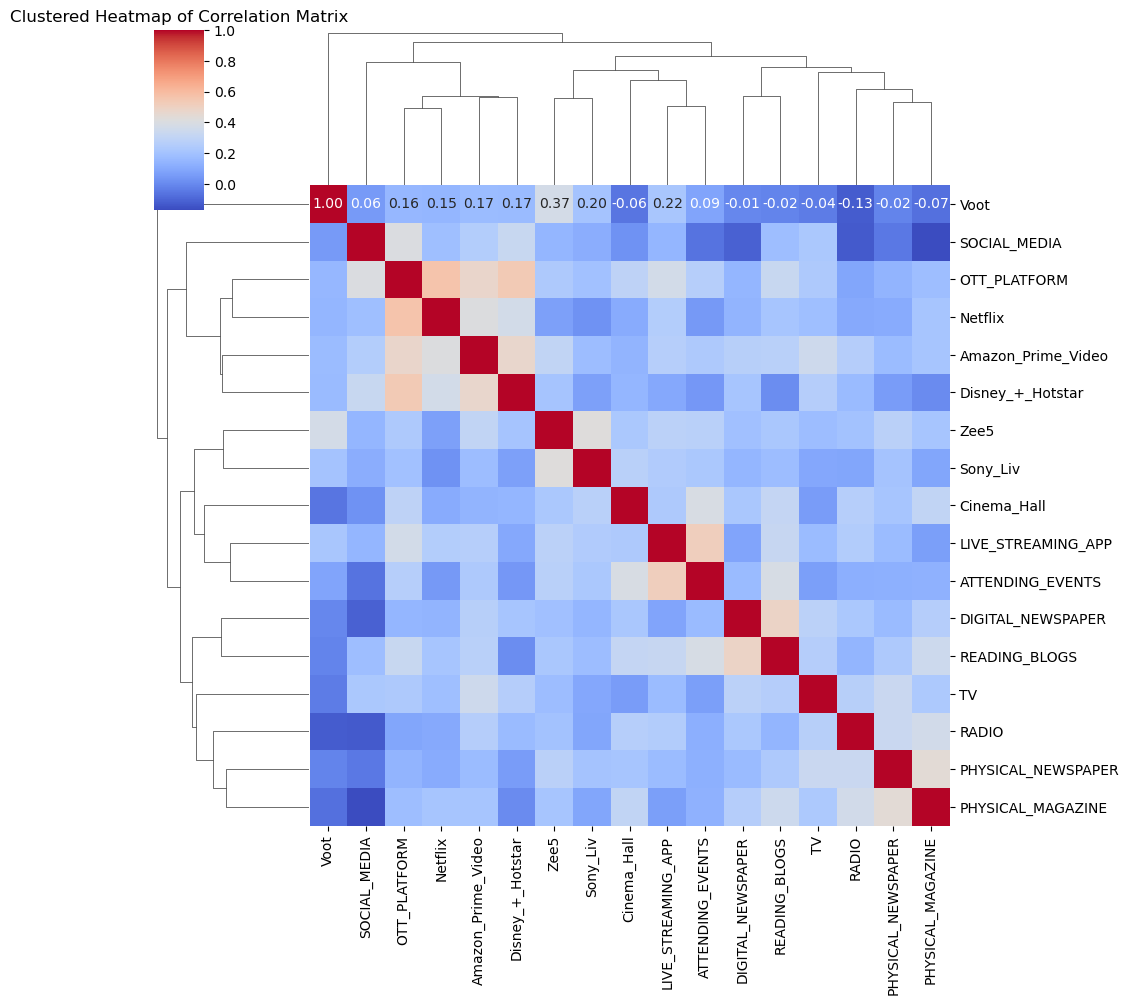

In [13]:
plt.figure(figsize=(14, 12))
sns.clustermap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Clustered Heatmap of Correlation Matrix')
plt.show()

In [19]:
data

,TV,RADIO,SOCIAL_MEDIA,OTT_PLATFORM,LIVE_STREAMING_APP,PHYSICAL_NEWSPAPER,DIGITAL_NEWSPAPER,PHYSICAL_MAGAZINE,READING_BLOGS,ATTENDING_EVENTS,Cinema_Hall,Netflix,Amazon_Prime_Video,Disney_+_Hotstar,Zee5,Voot,Sony_Liv
0,4,1,4,0,0,5,3,0,0,0,0,0,0,0,0,0,0
1,0,0,5,0,3,0,0,0,4,1,4,0,0,0,0,0,0
2,5,1,5,4,2,1,2,2,3,2,2,1,1,1,0,0,0
3,0,0,5,4,0,1,5,0,3,0,1,1,1,1,0,0,0
4,2,1,5,1,1,0,1,0,3,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,5,0,5,5,1,0,1,1,1,1,2,1,1,1,0,0,0
60,4,4,5,5,4,4,4,1,1,2,2,1,1,1,0,0,0
61,5,0,5,3,3,1,4,2,5,2,1,1,1,0,0,0,0
62,5,0,5,3,0,0,3,0,0,0,2,1,0,1,0,0,0


In [21]:
streaming_data=pd.read_csv("C:/Users/NITISH/Downloads/Stream.csv")
streaming_data

,Netflix,Amazon_Prime_Video,Disney_+_Hotstar,Zee5,Voot,Sony_Liv
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,1,1,1,0,0,0
3,1,1,1,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
59,1,1,1,0,0,0
60,1,1,1,0,0,0
61,1,1,0,0,0,0
62,1,0,1,0,0,0


In [22]:
streaming_mapped_data = streaming_data.replace({0: 'No', 1: 'Yes'})


In [23]:
print(streaming_data.describe())


         Netflix  Amazon_Prime_Video  Disney_+_Hotstar       Zee5       Voot  \
count  64.000000           64.000000         64.000000  64.000000  64.000000   
mean    0.593750            0.515625          0.531250   0.187500   0.031250   
std     0.495015            0.503706          0.502967   0.393398   0.175368   
min     0.000000            0.000000          0.000000   0.000000   0.000000   
25%     0.000000            0.000000          0.000000   0.000000   0.000000   
50%     1.000000            1.000000          1.000000   0.000000   0.000000   
75%     1.000000            1.000000          1.000000   0.000000   0.000000   
max     1.000000            1.000000          1.000000   1.000000   1.000000   

        Sony_Liv  
count  64.000000  
mean    0.125000  
std     0.333333  
min     0.000000  
25%     0.000000  
50%     0.000000  
75%     0.000000  
max     1.000000  


In [24]:
# Overall Streaming Platform Usage Analysis with mapped values
avg_streaming_usage_mapped = streaming_mapped_data.apply(lambda x: x.value_counts().sort_index().reset_index(drop=True)).transpose()
avg_streaming_usage_mapped.columns = streaming_mapped_data.apply(lambda x: x.value_counts().sort_index().index)
print("Average Streaming Platform Usage:\n", avg_streaming_usage_mapped)

Average Streaming Platform Usage:
                     (No, No, No, No, No, No)  (Yes, Yes, Yes, Yes, Yes, Yes)
Netflix                                   26                              38
Amazon_Prime_Video                        31                              33
Disney_+_Hotstar                          30                              34
Zee5                                      52                              12
Voot                                      62                               2
Sony_Liv                                  56                               8


In [46]:
# Correlation matrix
correlation_matrix = streaming_data.corr()
print(correlation_matrix)

                     Netflix  Amazon_Prime_Video  Disney_+_Hotstar      Zee5  \
Netflix             1.000000            0.407819          0.370565  0.071321   
Amazon_Prime_Video  0.407819            1.000000          0.467940  0.305393   
Disney_+_Hotstar    0.370565            0.467940          1.000000  0.210580   
Zee5                0.071321            0.305393          0.210580  1.000000   
Voot                0.148564            0.174078          0.168710  0.373878   
Sony_Liv            0.024049            0.177257          0.071007  0.423659   

                        Voot  Sony_Liv  
Netflix             0.148564  0.024049  
Amazon_Prime_Video  0.174078  0.177257  
Disney_+_Hotstar    0.168710  0.071007  
Zee5                0.373878  0.423659  
Voot                1.000000  0.203653  
Sony_Liv            0.203653  1.000000  


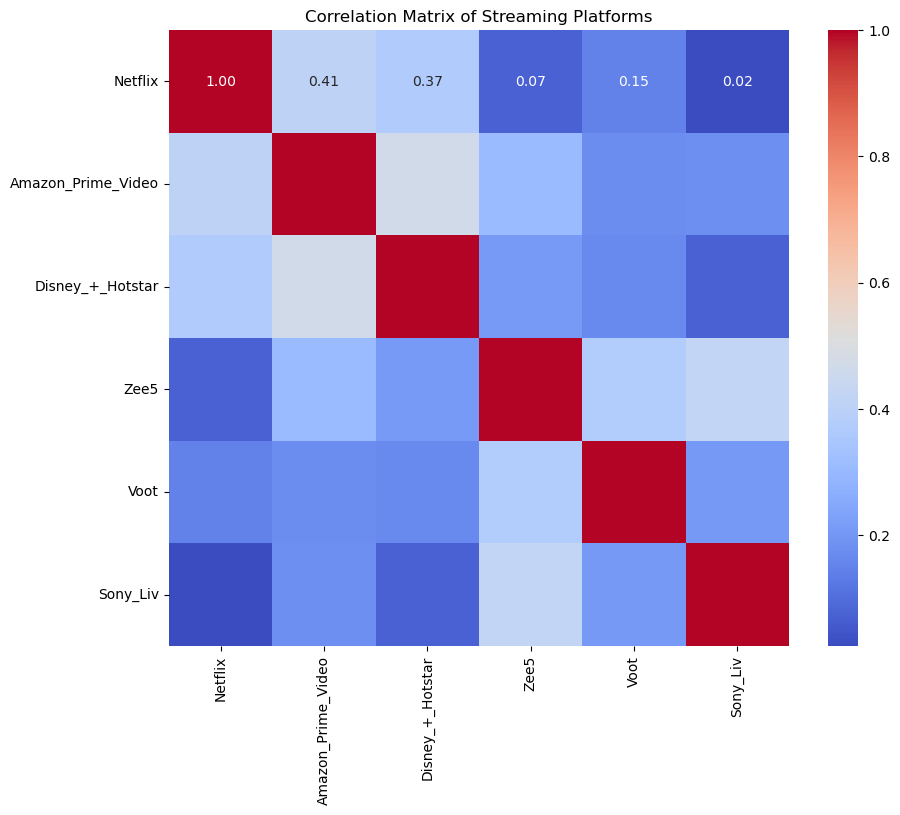

In [26]:
corr_matrix = streaming_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Streaming Platforms")
plt.show()

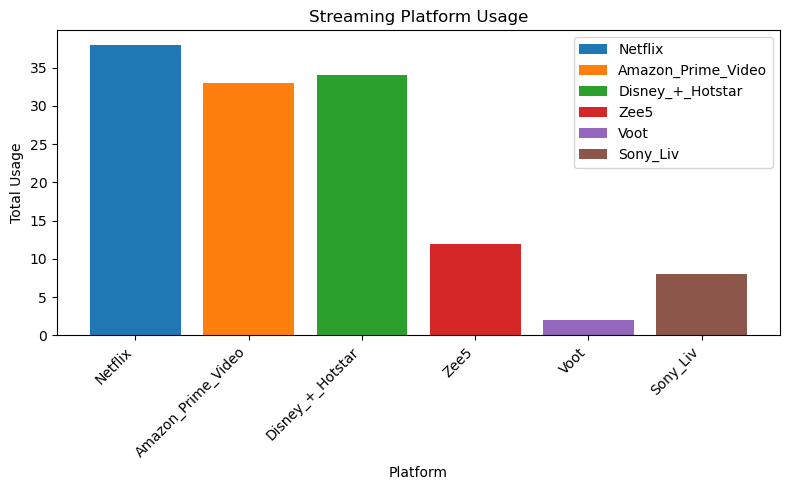

In [40]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 5))

# Iterate through each platform
for i, platform in enumerate(streaming_data.columns):
    ax.bar(i, streaming_data[platform].sum(), label=platform)

# Set x-axis tick positions and labels with custom offset
ax.set_xticks(np.arange(len(streaming_data.columns)))
ax.set_xticklabels(streaming_data.columns, rotation=45, ha='right')

# Set the title and labels
ax.set_title('Streaming Platform Usage')
ax.set_xlabel('Platform')
ax.set_ylabel('Total Usage')

# Show legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [41]:
from scipy.stats import ttest_ind


#Assumption
Ho: There is significant difference between Netflix and Amazon user
H1: There is no significant difference

In [43]:
# Example: Comparing usage between Netflix and Amazon Prime Video
netflix_usage = streaming_data['Netflix']
prime_video_usage = streaming_data['Amazon_Prime_Video']

#  t-test
t_statistic, p_value = ttest_ind(netflix_usage, prime_video_usage)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 0.8849816052163783
P-value: 0.37785226977994424


From the above test we can conclude that their is no significant difference between user of netflix and amazon prime, since the p-value is greater than 0.05 so we fail to reject the ull hypothesis

In [44]:
# Frequency of usage
usage_frequency = streaming_data.sum()
print(usage_frequency)

Netflix               38
Amazon_Prime_Video    33
Disney_+_Hotstar      34
Zee5                  12
Voot                   2
Sony_Liv               8
dtype: int64
